In [ ]:
file="new_11074_longer_than_10min_p4_1.txt"
with open(file,"r") as f:
    lines = f.readlines()
    for line in lines:
        temp=line.split(",")
        url=temp[0].replace("hea","dat")
        !wget -r -N -c -np $url -P download
#don't run!!!!!!!!      

In [ ]:
file="new_11074_longer_than_10min_p4_1.txt"
with open(file,"r") as f:
    lines = f.readlines()
    for line in lines:
        temp=line.split(",")
        url=temp[0]
        !wget -r -N -c -np $url -P download
#don't run!!!!!!!!               

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import wfdb

import matplotlib as plot
from scipy.signal import find_peaks
import shutil
import psutil
import pandas as pd  



In [2]:
path="download/physionet.org/files/mimic3wdb/1.0/39"
dirs= glob.glob(path+"/*")


In [3]:
sample_size=1000
ppg_min=50
ppg_max=150
ecg_min=5
ecg_max=25
dbp_lower=30
dbp_upper=130

sbp_upper=200
sbp_lower=80

mean_upper=140
mean_lower=50

def orgnize_data(arr,res):
    for i in range((int)(len(arr)/sample_size)):
        temp = arr[ i*sample_size:(i+1)*sample_size]
        res.append(temp)
        

In [4]:
input_final=np.empty((0, 2000))
output_final=np.empty((0, 2))
cur_dir=0
cur_file=0
for d in range(20,len(dirs)):
    files=glob.glob(dirs[d]+"/*")
    for f in range(len(files)):
        total, used, free = shutil.disk_usage("/")
        if free>30000000000 and psutil.virtual_memory()[2]<50:
            url=files[f].replace(".dat","")
            url=url.replace(".hea","")
            signals, fields = wfdb.rdsamp(url)
            ppg_i=fields['sig_name'].index("PLETH")
            ecg_i=fields['sig_name'].index("II")
            bp_i=fields['sig_name'].index("ABP")
            ppg_list=[]
            ecg_list=[]
            bp_list=[]
            removed_index=[]
            
            orgnize_data(signals[:,ppg_i],ppg_list)
            orgnize_data(signals[:,ecg_i],ecg_list)
            orgnize_data(signals[:,bp_i],bp_list)
            
            
            for i in range(len(ppg_list)) :
                if np.any(np.isnan(ppg_list[i])):
                    removed_index.append(i)
                    '''try:
                        working_data, measures = hp.process(ppg_list[i], 100.0)
                        if measures["bpm"]<  ppg_min or   measures["bpm"]>ppg_max:
                            removed_index.append(i)

                    except:
                        removed_index.append(i)'''


            for i in range(len(ecg_list)) :
                if not i in removed_index:
                    if np.any(np.isnan(ecg_list[i])):
                        removed_index.append(i)
                        '''try:
                            peaks, info = nk.ecg_peaks(ecg_list[i], sampling_rate=125)
                            beats=len(info['ECG_R_Peaks'])
                            if beats<ecg_min or beats>ecg_max:
                                removed_index.append(i)



                        except:
                            removed_index.append(i)'''
            ppg=[]
            ecg=[]
            i_list=np.empty((0,0))
            o_list=[]
            for i in range(len(bp_list)) :
                if not i in removed_index:
                    dbp_temp=min(bp_list[i])
                    sbp_temp=max(bp_list[i])
                    
                    if np.isnan(dbp_temp) or np.isnan(sbp_temp):                       
                        removed_index.append(i)
                    elif dbp_temp<dbp_lower or dbp_temp>dbp_upper:
                        removed_index.append(i)
                    elif sbp_temp<sbp_lower or sbp_temp>  sbp_upper:
                        removed_index.append(i)
                    else:
                        bp=[dbp_temp,sbp_temp]
                        o_list.append(bp)
                    
            
            
             
            for i in range(len(ecg_list)):
                if not i  in removed_index:
                    ecg.append(ecg_list[i])
                    
            for i in range(len(ppg_list)):  
                if not i  in removed_index:
                    ppg.append(ppg_list[i])          
            
            i_list=np.hstack((np.array(ecg),np.array(ppg)))
            o_list=np.array(o_list)
            if i_list.shape[0]>0:
                input_final=np.append(input_final,i_list,axis=0)
                output_final=np.append(output_final,o_list,axis=0)
            cur_dir=d
            cur_file=f
            
            print(d)
            print(f)
            print('The CPU usage is: ', psutil.cpu_percent(4))
            print('RAM memory % used:', psutil.virtual_memory()[2])
        else:
            print("disk full")
            break
        


20
0
The CPU usage is:  12.6
RAM memory % used: 5.9
20
1
The CPU usage is:  0.0
RAM memory % used: 5.4
20
2
The CPU usage is:  0.1
RAM memory % used: 5.6
20
3
The CPU usage is:  0.1
RAM memory % used: 6.3
21
0
The CPU usage is:  0.1
RAM memory % used: 5.9
21
1
The CPU usage is:  0.1
RAM memory % used: 5.9
22
0
The CPU usage is:  0.1
RAM memory % used: 6.3
22
1
The CPU usage is:  0.1
RAM memory % used: 7.4
22
2
The CPU usage is:  0.1
RAM memory % used: 6.3
22
3
The CPU usage is:  0.0
RAM memory % used: 7.5
22
4
The CPU usage is:  0.4
RAM memory % used: 6.6
22
5
The CPU usage is:  0.0
RAM memory % used: 6.6
22
6
The CPU usage is:  0.2
RAM memory % used: 6.8
22
7
The CPU usage is:  0.1
RAM memory % used: 6.8
22
8
The CPU usage is:  0.1
RAM memory % used: 6.8
22
9
The CPU usage is:  0.2
RAM memory % used: 6.8
22
10
The CPU usage is:  0.0
RAM memory % used: 6.9
22
11
The CPU usage is:  0.1
RAM memory % used: 7.4
23
0
The CPU usage is:  0.0
RAM memory % used: 9.2
23
1
The CPU usage is:  0.0


32
1
The CPU usage is:  0.0
RAM memory % used: 33.8
32
2
The CPU usage is:  0.1
RAM memory % used: 34.1
32
3
The CPU usage is:  0.0
RAM memory % used: 35.0
32
4
The CPU usage is:  0.0
RAM memory % used: 34.3
32
5
The CPU usage is:  0.0
RAM memory % used: 35.2
32
6
The CPU usage is:  0.0
RAM memory % used: 34.3
32
7
The CPU usage is:  0.0
RAM memory % used: 34.3
32
8
The CPU usage is:  0.0
RAM memory % used: 34.9
32
9
The CPU usage is:  0.0
RAM memory % used: 35.0
32
10
The CPU usage is:  0.0
RAM memory % used: 35.6
32
11
The CPU usage is:  0.1
RAM memory % used: 35.7
33
0
The CPU usage is:  0.0
RAM memory % used: 37.4
33
1
The CPU usage is:  0.0
RAM memory % used: 38.5
33
2
The CPU usage is:  0.0
RAM memory % used: 36.3
33
3
The CPU usage is:  0.0
RAM memory % used: 37.3
33
4
The CPU usage is:  0.2
RAM memory % used: 38.0
33
5
The CPU usage is:  0.0
RAM memory % used: 39.6
33
6
The CPU usage is:  0.0
RAM memory % used: 40.3
33
7
The CPU usage is:  0.1
RAM memory % used: 38.5
33
8
The C

disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full
disk full


In [6]:
output_final.shape


(451472, 2)

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [8]:

def Model(input_dim, activation, num_class):
    model = Sequential()
    
    
    model.add(LSTM(1024, input_shape=(1, 9),  dropout = 0.25, recurrent_dropout = 0.25))
    
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation(activation))

    model.add(Dropout(0.5))

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    model.add(Dense(512))
    model.add(BatchNormalization())    
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    
    model.add(Dense(num_class))    
    model.add(Activation('linear'))
    model.compile(loss='Huber',
                      optimizer=optimizers.Adam(lr = 0.001),
                      metrics=['MeanAbsoluteError']
                )
    return model

In [9]:
input_dim = input_final.shape[1]
activation = 'sigmoid'
classes = 2
model = Model(input_dim=input_dim, activation=activation, num_class=classes)

2022-05-31 23:41:03.575037: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-31 23:41:03.575698: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-40-90): /proc/driver/nvidia/version does not exist
2022-05-31 23:41:03.578807: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                          min_delta = 0,
                                                          patience = 5,
                                                          verbose=1,
                                                          mode="auto",
                                                          baseline=None,
                                                          restore_best_weights=True)

In [10]:
model_0 = model.fit(input_final, # using the first 1million rows for speed.
                    output_final,
                    epochs=50,
                    batch_size=75,
                    verbose = 1,
                    validation_split=0.1,
                    validation_data=None,
                    shuffle=True,
                    class_weight=None,
                    sample_weight=None,
                    initial_epoch=0,
                    steps_per_epoch=None,
                    validation_steps=None,
                    validation_batch_size=None,
                    validation_freq=1,
                    max_queue_size=10,
                    workers=1,
                    use_multiprocessing=False
                   )

2022-05-31 23:41:15.735377: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3250592000 exceeds 10% of free system memory.


Epoch 1/50
5418/5418 [==============================] - 93s 17ms/step - loss: 13.3212 - mean_absolute_error: 13.8103 - val_loss: 7.2223 - val_mean_absolute_error: 7.7181
Epoch 2/50
5418/5418 [==============================] - 91s 17ms/step - loss: 10.4622 - mean_absolute_error: 10.9499 - val_loss: 6.4724 - val_mean_absolute_error: 6.9364
Epoch 3/50
5418/5418 [==============================] - 91s 17ms/step - loss: 9.9218 - mean_absolute_error: 10.4086 - val_loss: 6.5496 - val_mean_absolute_error: 7.0377
Epoch 4/50
5418/5418 [==============================] - 91s 17ms/step - loss: 9.5282 - mean_absolute_error: 10.0144 - val_loss: 6.1598 - val_mean_absolute_error: 6.5825
Epoch 5/50
5418/5418 [==============================] - 91s 17ms/step - loss: 9.1972 - mean_absolute_error: 9.6828 - val_loss: 5.9372 - val_mean_absolute_error: 6.3942
Epoch 6/50
5418/5418 [==============================] - 91s 17ms/step - loss: 8.9348 - mean_absolute_error: 9.4202 - val_loss: 5.8178 - val_mean_absolute_

In [11]:
model_0.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

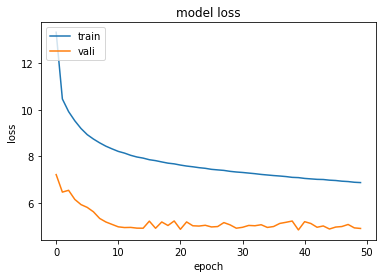

In [12]:
plt.figure()
plt.plot(model_0.history['loss'])
plt.plot(model_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vali'], loc='upper left')
plt.show()


In [13]:
model.save('./model_3',save_format='tf')


2022-06-01 01:01:34.883580: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model_3/assets


In [8]:
loaded_model = tf.keras.models.load_model('model_3')

2022-06-05 04:42:46.071372: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-05 04:42:46.071455: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-40-90): /proc/driver/nvidia/version does not exist
2022-06-05 04:42:46.073328: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


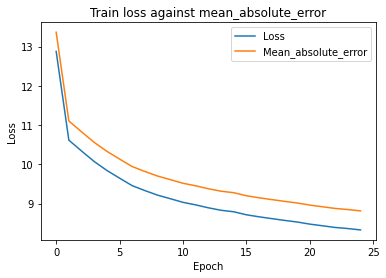

<Figure size 1728x1296 with 0 Axes>

In [20]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(model_0.history['loss'])
plt.plot(model_0.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])
plt.figure(figsize=(24, 18))
plt.show()

In [21]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              2049024   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [9]:
predicted_y=loaded_model.predict(input_final)

2022-06-05 04:43:47.144707: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3611776000 exceeds 10% of free system memory.


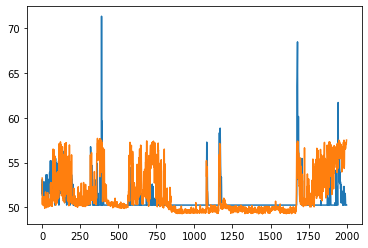

In [22]:
x=range(2000)
y=output_final[437000:439000,0]
plt.plot(x,y)
x_1=range(2000)
y_1=predicted_y[437000:439000,0]
plt.plot(x_1,y_1)
plt.show()

In [ ]:
ppg_feed= np.array(ppg_final)
ecg_feed= np.array(ecg_final)
sbp_feed= np.array(sbp_final)
dbp_feed= np.array(dbp_final)

In [ ]:
df1 = pd.DataFrame(ppg_feed) 
df2= pd.DataFrame(ecg_feed)

In [ ]:
files=glob.glob(dirs[0]+"/*")

In [ ]:
url=files[1].replace(".dat","")
print(url)

In [ ]:
signals, fields = wfdb.rdsamp(url)

In [ ]:
fields['sig_name']

In [ ]:
ppg_i=fields['sig_name'].index("PLETH")
ecg_i=fields['sig_name'].index("II")
bp_i=fields['sig_name'].index("ABP")

In [ ]:
ppg_list=[]
ecg_list=[]
bp_list=[]

In [ ]:
sample_size=1000
ppg_min=50
ppg_max=150
ecg_min=5
ecg_max=25
dbp_lower=30
dbp_upper=110

sbp_upper=200
sbp_lower=80

mean_upper=140
mean_lower=50


def orgnize_data(arr,res):
    for i in range((int)(len(arr)/sample_size)):
        temp = arr[ i*sample_size:(i+1)*sample_size]
        res.append(temp)

        

In [ ]:
orgnize_data(signals[:,ppg_i],ppg_list)
orgnize_data(signals[:,ecg_i],ecg_list)
orgnize_data(signals[:,bp_i],bp_list)
removed_index=[]

In [ ]:
import heartpy as hp
import matplotlib as plot
import neurokit2 as nk
from scipy.signal import find_peaks

            

In [ ]:
'''
for i in range(len(ppg_list)) :
    try:
        working_data, measures = hp.process(ppg_list[i], 100.0)
        if measures["bpm"]<  ppg_min or   measures["bpm"]>ppg_max:
            removed_index.append(i)
            
    except:
        removed_index.append(i)
        
    
for i in range(len(ecg_list)) :
    if not i in removed_index:
        try:
            peaks, info = nk.ecg_peaks(ecg_list[i], sampling_rate=125)
            beats=len(info['ECG_R_Peaks'])
            if beats<ecg_min or beats>ecg_max:
                removed_index.append(i)
                
            

        except:
            removed_index.append(i)
'''
dbp = []
sbp = []
for i in range(len(bp_list)) :
    #if not i in removed_index:
    temp_dbp=min(bp_list[i])
    temp_sbp=max(bp_list[i])
    #avg=sum(bp_list[i])/len(bp_list[i])
        
    if temp_dbp<dbp_lower or temp_dbp>dbp_upper:
        #removed_index.append(i)
        ecg_list.pop(i)
        ppg_list.pop(i)
    elif temp_sbp<sbp_lower or temp_sbp>  sbp_upper:
        #removed_index.append(i)
        ecg_list.pop(i)
        ppg_list.pop(i)
    else:
        dbp.append(temp_dbp)
        sbp.append(temp_sbp)


In [ ]:
'''for item in removed_index:
    print(item)
    x=range(1000)
    y=bp_list[item]
    plt.plot(x,y)
    plt.show() '''
print(len(dbp))
print(len(ecg_list))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.fftpack as sf
import scipy.signal as ss
from scipy.fft import fft, fftfreq

'''yf = sf.fft(bp_list)
print(yf)
xf = list(range(1,1000))
freq = fftfreq(1000, d=1)
height_threshold = 0.05
peaks_index, properties = find_peaks(abs(yf), height = height_threshold)

plt.plot(freq, np.abs(yf),'-', freq[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()
'''
#for item in bp_list[100]:
#detrend_bp = ss.detrend(bp_list[100])
avg_bp = sum(bp_list[100]) / 1000
bp_list[100] = bp_list[100] - avg_bp
np_bp = np.abs( np.array(bp_list[100]))
yf = fft(np_bp)
freq = fftfreq(1000, 1/125)
plt.plot(freq,2/1000*np.abs(yf))
plt.xlim(0,10)
plt.show() 
x=range(1000)
y=bp_list[100]
plt.plot(x,y)
plt.show() 
#print(bp_list[0])
#print(np_bp.shape)

In [ ]:
len(bp_list[100])


In [ ]:
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

import os # system-wide functions
os.listdir('/kaggle/input/BloodPressureDataset')

sbp = [] #Systolic Blood Pressure
dbp = [] #Diastolic Blood Pressue
size = 125 #sample size


        
        sbp.append(max_value)
        dbp.append(min_value)
        ecg.append(temp_ecg)
        bp.append(temp_bp)

In [27]:
input_final.shape

(466951, 2000)